# Pandas
Python library for manipulating tabular data

Provides high performance data structures and analysis tools

There are two main structures:
- Series
- Dataframe

## Pandas series
---
A 1-d array of indexed data (like a vector)

- Each series has only one datatype
- You can think of the object as a dictionary with the index being the key

In [2]:
import pandas as pd #name comes from a concatenation of panel and data
import datetime as dt #used in the index section
import numpy as np #element wise operations

### Creating a series object

In [4]:
s = pd.Series([1,2,3])
display(s) #this is like print but is nicer for pandas objects

0    1
1    2
2    3
dtype: int64

In [5]:
s.values  #get values

array([1, 2, 3], dtype=int64)

In [6]:
s.index  #get the index

RangeIndex(start=0, stop=3, step=1)

In [7]:
s = pd.Series([1,2,3], index=['a','b','c']) #can define the index when constructing
display(s)

a    1
b    2
c    3
dtype: int64

In [8]:
s = pd.Series({'a':111, 'b':222}) #construct from a dictionary
display(s)

a    111
b    222
dtype: int64

In [9]:
s['a'] #use square brackets to call a specific value

111

### Series types
Each one has a single datatype.

In [11]:
s.dtype #find the datatype

dtype('int64')

In [12]:
#you can do something called typecasting (converting datatypes)
s.astype(float) #this creates a new series - doesnt overwrite the old one unless explictly told to

a    111.0
b    222.0
dtype: float64

In [13]:
type(s.values) #behind pandas we are using NumPy

numpy.ndarray

### Shape

In [16]:
s = pd.Series({'a':1, 'b':2, 'c':3})
s.shape #tells us how many elements and dimensions we have: here it is 1-d with 3 elements
#returns a tuple containing the value of 3

(3,)

## Pandas dataframes
---
A pandas df is a 2-d array index by rows and columns.

Each column in a df corresponds to a series object.

In [17]:
d = pd.DataFrame([1,2,3,4])
display(d)

,0
0,1
1,2
2,3
3,4


In [18]:
d = pd.DataFrame([1,2,3,4], columns=['Col1']) #have assigned the column a name
display(d)

,Col1
0,1
1,2
2,3
3,4


In [3]:
s = pd.Series({'a':123, 'b':456})
#df = pd.DataFrame(s)
#display(df)
s

a    123
b    456
dtype: int64

### Dataframes with multiple columns

In [21]:
#from a list of lists
data =[[1,2],
       [3,4],
       [5,6]] #3 rows in the form of a list of list

df = pd.DataFrame(data, columns=['Col1', 'Col2'])
display(df)

,Col1,Col2
0,1,2
1,3,4
2,5,6


In [22]:
#from a list of dictionaries
#each key corresponds to a column name
#each dict is a row

data = [{'a':111, 'b':222},
        {'a':333, 'b':444},
        {'b':666, 'a':555}]
df = pd.DataFrame(data)
display(df)

,a,b
0,111,222
1,333,444
2,555,666


In [23]:
#from a dictionary of list values
data = {'a':[1,2,3,4], 'b':[5,6,7,8]}
df = pd.DataFrame(data)
display(df)

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [24]:
#from a dictionary of series
s1 = pd.Series([1,2], index=['a','b'])
s2 = pd.Series([3,4], index=['a','b'])
data = {'Series1':s1, 'Series2':s2}
df = pd.DataFrame(data)
display(df)

,Series1,Series2
a,1,3
b,2,4


In [25]:
s1 = pd.Series([1,2], index=['a','b'])
s2 = pd.Series([3,4], index=['a','c'])
data = {'Series1':s1, 'Series2':s2}
df = pd.DataFrame(data)
display(df) #shows NaN's here (shows index alignment)

,Series1,Series2
a,1.0,3.0
b,2.0,NaN
c,NaN,4.0


In [27]:
df.dtypes #these are floats now because of the NaN's in the df

Series1    float64
Series2    float64
dtype: object

### Getting the index, columns, values and shape

In [28]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [29]:
df.columns

Index(['Series1', 'Series2'], dtype='object')

In [30]:
df.values #these are all attributes of the df object

array([[ 1.,  3.],
       [ 2., nan],
       [nan,  4.]])

In [31]:
df.shape

(3, 2)

Concept Check
-------------
-> What is a series object? How is it different to a DataFrame?

Series: a 1-d array of indexed data, Dataframe: a 2-d array of indexed data

-> How many datatypes can there be for a single series instance?

Just one

-> What is the data type for a column in a dataframe?

It is a series

-> Construct a pandas series in two different ways. (Above)

-> Construct a pandas dataframe object in two different ways. (Above)


## Pandas index object

The series and the dataframe both have an index

Can consider them an immutable list or tuple

In [34]:
idx = pd.Index([1,2,3])
idx

Int64Index([1, 2, 3], dtype='int64')

In [38]:
pd.Index([dt.datetime(2020,1,1), dt.datetime(2020,1,2)]) #this will be used for timeseries data

DatetimeIndex(['2020-01-01', '2020-01-02'], dtype='datetime64[ns]', freq=None)

## Series - Data indexing and selection
---
We can index a panda series in different ways: HINT FOR THE TEST
- .loc and .iloc accessors: explicit vs. implicit indexing
- slicing
- boolean indexing



### Implicit vs Explicit

In [39]:
s = pd.Series(['a','b','c','d'], index=[1,2,3,4])
display(s)

1    a
2    b
3    c
4    d
dtype: object

In [40]:
s.loc[1] #explicit indexing using actual labels

'a'

In [41]:
s.iloc[0] #implicit indexing, using the position in the column

'a'

In [42]:
s[1] #unspecified indexing: if index is numeric it uses that, if strings then it uses positional -- not recommended

'a'

### Slicing

In [45]:
s = pd.Series(['a','b','c','d'], index=[1,2,3,4])
s.loc[1:3] #this includes the last index - this is a feature of explicit slicing
#this is not the same as slicing for lists and tuples
#the reason is clearer when you have an index that is not in alphabetical order 
#for instance - there may not be a concept of 'before' the stop element of the index so it has to include it

1    a
2    b
3    c
dtype: object

In [46]:
s.iloc[0:2] #this is more consistent with the rest of python

1    a
2    b
dtype: object

In [47]:
s = pd.Series([1,3,5,7,9], index=['a','c','e','d','b'])
display(s)

a    1
c    3
e    5
d    7
b    9
dtype: int64

In [48]:
print(s['a':'e'])
print(s['a':'b']) #this is using explicit, see that it finds the stop index then wi

a    1
c    3
e    5
dtype: int64
a    1
c    3
e    5
d    7
b    9
dtype: int64


### Boolean Indexing


In [53]:
s = pd.Series(['a','b','c','d'], index=[1,2,3,4])
mask = [True,True,True,False] #this can be bare long
s[mask] #only returns that which is true

1    a
2    b
3    c
dtype: object

In [55]:
s = pd.Series([1,2,3,4])
s <= 3
s[s<=3] #quicker way to boolean index

1    1
2    2
3    3
dtype: int64

In [57]:
mask = s.isin([2,3,5]) #isin gives boolean as well
s[mask]  #quite nice way to get it done

2    2
3    3
dtype: int64

### Assigning values

In [58]:
s = pd.Series([1,2,3,4])
display(s)

0    1
1    2
2    3
3    4
dtype: int64

In [59]:
s.iloc[0] = 88462987436
display(s)

0    88462987436
1              2
2              3
3              4
dtype: int64

In [60]:
#assign a value to a slice
s.loc[1:2] = 826487
display(s)

0    88462987436
1         826487
2         826487
3              4
dtype: int64

In [61]:
#assign mulltiple values to a slice
s.iloc[2:4] = [2020,2021] #select the two last elements; stop index not included
display(s)

0    88462987436
1         826487
2           2020
3           2021
dtype: int64


Concept Checks
--------------
-> What are the different ways we can index a series?

Implicitly, explicitly, clicing and boolean

-> Suppose you a series pd.Series([1,2,3,4], index=['a','b','c','d'])

-> Using implicit and explicit indexing, get the second element

-> Using explicit indexing, slice the series to get the first three elements

-> Using a boolean mask, select the even numbers s[s % 2 == 0]


In [65]:
s = pd.Series([1,2,3,4], index=['a','b','c','d'])
print(s.loc['b']) #explicit
print(s.iloc[1]) #implicit
print('----')
print(s.loc['a':'c']) #explicit
print('----')
mask = s%2 == 0
print(s[mask])

2
2
----
a    1
b    2
c    3
dtype: int64
----
b    2
d    4
dtype: int64


## Dataframe indexing and selection

In [4]:
def make_df(cols,rows):
    data = {c:[str(c)+str(r) for r in rows] for c in cols}
    return pd.DataFrame(data)

df = make_df('abc',[1,2,3,4])
df.index = [5,6,7,8]
display(df)

,a,b,c
5,a1,b1,c1
6,a2,b2,c2
7,a3,b3,c3
8,a4,b4,c4


### Implicit and explicit slicing

In [67]:
df.iloc[0,0] #first row and first column implicit

'a1'

In [68]:
df.loc[5,'a'] #first row first column explicit

'a1'

In [70]:
df.iloc[1,:]
df.iloc[1] #both work

a    a2
b    b2
c    c2
Name: 6, dtype: object

In [7]:
df.loc[6:7,['a','c']] #includes the stop index

,a,c
6,a2,c2
7,a3,c3


In [73]:
df.iloc[1:3] #doesn't include the stop index

,a,b,c
6,a2,b2,c2
7,a3,b3,c3


### Boolean indexing

In [74]:
mask = [False,True,False,True]
df[mask]

,a,b,c
6,a2,b2,c2
8,a4,b4,c4


### Column selection

In [75]:
df['b'] #this will pull the whole column as a series

5    b1
6    b2
7    b3
8    b4
Name: b, dtype: object

In [76]:
df[['a','b']] #have a list of the columns then subset it
#this is still a dataframe object

,a,b
5,a1,b1
6,a2,b2
7,a3,b3
8,a4,b4


## Element-wise data operations 
Pandas leverages on NumPy's universal functions (ufuncts) to do element wise operations very fast

See https://docs.scipy.org/doc/numpy/reference/ufuncs.html


In [5]:
def make_df2():
    data = np.array(range(10)).reshape(-1,2) #the -1 means any number of rows, 2 means 2 columns
    return pd.DataFrame(data, columns=['col1','col2'])

In [82]:
df=make_df2()
display(df)

,col1,col2
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [84]:
df['col1'] + 900 #can add a constant

0    900
1    902
2    904
3    906
4    908
Name: col1, dtype: int32

In [85]:
df['col1']*df['col2'] #can do things with multiple series

0     0
1     6
2    20
3    42
4    72
dtype: int32

In [86]:
s1 = pd.Series([1,2,3], index=['a','b','c'])
s2 = pd.Series([4,5,6], index=['b','c','d'])

s1+s2

a    NaN
b    6.0
c    8.0
d    NaN
dtype: float64

In [88]:
s1.add(s2, fill_value=0) #to escape the NaN's

a    1.0
b    6.0
c    8.0
d    6.0
dtype: float64

In [89]:
df + 900

,col1,col2
0,900,901
1,902,903
2,904,905
3,906,907
4,908,909


In [90]:
df + df

,col1,col2
0,0,2
1,4,6
2,8,10
3,12,14
4,16,18


In [92]:
df + [1,2] #adds 1 to all in col 1 and 2 to all in col 2

,col1,col2
0,1,3
1,3,5
2,5,7
3,7,9
4,9,11


## .apply() method
Applies a function element wise to a series or dataframe

In [94]:
df['col1'].apply(lambda x: x**2) #if there are no supported ufunc then we can use this, but is slow like a for loop
#best used for crazy functions that you want to apply to every row in a df

0     0
1     4
2    16
3    36
4    64
Name: col1, dtype: int64

In [95]:
df.apply(lambda x: x**3)

,col1,col2
0,0,1
1,8,27
2,64,125
3,216,343
4,512,729


In [97]:
#using apply for row by row application
#we will do df['col1']+ 2*df['col2']
df.apply(lambda row: row['col1'] + 2*row['col2'],axis=1)
#apply across rows = 1, columns = 0

0     2
1     8
2    14
3    20
4    26
dtype: int64

In [98]:
df.apply(lambda col: sum(col), axis=0)

col1    20
col2    25
dtype: int64

Concept Check

1 -> If you use df.apply(..., axis=0), what is the shape of the output? Suppose df.shape = (10,5) a series, length 5

2 -> If you use df.apply(..., axis=1), what is the shape of the output? Suppose df.shape = (10,5) a series, length 10

3 -> Use .apply on a series. The input to the function is x. If x is even, return 0. Else, return x.
   Eg. pd.Series([1,2,3,4,5]) -> [1,0,3,0,5]

4 -> Suppose you had a dataframe df = pd.DataFrame({'currency':['USD','AUD','USD'], 'amount':[100,200,300]})
   Use the apply method to get a column with the amounts in GBP.
   To go from AUD to GBP, multiply by 1.94.
   To go from USD to GBP, multiply by 1.32.

5 -> Compare the time it takes to use apply vs a ufunc. Use %timeit.


In [102]:
#q3

q3 = pd.Series([1,2,3,4,5]).apply(lambda x: x%2 * x)
q3

0    1
1    0
2    3
3    0
4    5
dtype: int64

In [116]:
## q4
df = pd.DataFrame({'currency':['USD','AUD','USD'], 'amount':[100,200,300]})
        
df.apply(lambda x: x.iloc[1]*1.32 if x.iloc[0]=='USD' else x.iloc[1]*1.94, axis=1)


0    132.0
1    388.0
2    396.0
dtype: float64

In [117]:
# q5

s=pd.Series(range(10000))
%timeit s.apply(lambda x: x*10)
    

9.65 ms ± 859 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [118]:
%timeit s*10 #this is like 10/20x faster: use u functs where you can

358 µs ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [120]:
%timeit for i in s: i*10

3.82 ms ± 249 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Missing data

In [121]:
def make_df3():
    data = np.array(range(24)).reshape(-1,3)
    df   = pd.DataFrame(data, columns=['col1', 'col2', 'col3'])
    df.iloc[0,1] = np.nan
    df.iloc[4,1] = np.nan
    df.iloc[6,0] = np.nan
    return df

In [134]:
df = make_df3()
display(df)

,col1,col2,col3
0,0.0,NaN,2
1,3.0,4.0,5
2,6.0,7.0,8
3,9.0,10.0,11
4,12.0,NaN,14
5,15.0,16.0,17
6,NaN,19.0,20
7,21.0,22.0,23


In [124]:
df.dropna(axis=0) #this creates a new dataframe df.dropna(axis=0, inplace=True) will change the actual dataframe

,col1,col2,col3
1,3.0,4.0,5
2,6.0,7.0,8
3,9.0,10.0,11
5,15.0,16.0,17
7,21.0,22.0,23


In [125]:
df.dropna(axis=1) #dropped the columns instead - you wont do this really

,col3
0,2
1,5
2,8
3,11
4,14
5,17
6,20
7,23


In [126]:
df.isnull() #booleans with True indicating NaN's

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,True,False
5,False,False,False
6,True,False,False
7,False,False,False


In [139]:
mask = df['col1'].isnull()
df.loc[mask,'col1'] = 9484
display(df)

,col1,col2,col3
0,0.0,NaN,2
1,3.0,4.0,5
2,6.0,7.0,8
3,9.0,10.0,11
4,12.0,NaN,14
5,15.0,16.0,17
6,9484.0,19.0,20
7,21.0,22.0,23


In [140]:
df=make_df3()
df.fillna({'col1':123, 'col2':456})

,col1,col2,col3
0,0.0,456.0,2
1,3.0,4.0,5
2,6.0,7.0,8
3,9.0,10.0,11
4,12.0,456.0,14
5,15.0,16.0,17
6,123.0,19.0,20
7,21.0,22.0,23


In [141]:
df.fillna(method='ffill')

,col1,col2,col3
0,0.0,NaN,2
1,3.0,4.0,5
2,6.0,7.0,8
3,9.0,10.0,11
4,12.0,10.0,14
5,15.0,16.0,17
6,15.0,19.0,20
7,21.0,22.0,23


In [142]:
df.fillna(method='bfill')

,col1,col2,col3
0,0.0,4.0,2
1,3.0,4.0,5
2,6.0,7.0,8
3,9.0,10.0,11
4,12.0,16.0,14
5,15.0,16.0,17
6,21.0,19.0,20
7,21.0,22.0,23


In [143]:
df

,col1,col2,col3
0,0.0,NaN,2
1,3.0,4.0,5
2,6.0,7.0,8
3,9.0,10.0,11
4,12.0,NaN,14
5,15.0,16.0,17
6,NaN,19.0,20
7,21.0,22.0,23


In [144]:
df.fillna(df.mean()) #impute the mean of a column

,col1,col2,col3
0,0.000000,13.0,2
1,3.000000,4.0,5
2,6.000000,7.0,8
3,9.000000,10.0,11
4,12.000000,13.0,14
5,15.000000,16.0,17
6,9.428571,19.0,20
7,21.000000,22.0,23


In [145]:
df.fillna(df.interpolate()) #interpolate the missing values

,col1,col2,col3
0,0.0,NaN,2
1,3.0,4.0,5
2,6.0,7.0,8
3,9.0,10.0,11
4,12.0,13.0,14
5,15.0,16.0,17
6,18.0,19.0,20
7,21.0,22.0,23


In [146]:
pd.Series([1,np.nan,np.nan,500]).interpolate() #it will work regardless of the amount of missing values but will always do linear

0      1.000000
1    167.333333
2    333.666667
3    500.000000
dtype: float64

## Combining dataframes


### Concatenate and append

In [147]:
df1 = pd.DataFrame([[1,2],[3,4]], columns=['a','b'])
df2 = pd.DataFrame([[5,6],[7,8]], columns=['a','b'])

print(df1)
print(df2)

   a  b
0  1  2
1  3  4
   a  b
0  5  6
1  7  8


In [148]:
pd.concat([df1,df2], axis=0) #but the index is not unique anymore

,a,b
0,1,2
1,3,4
0,5,6
1,7,8


In [149]:
pd.concat([df1,df2], axis=1) 

,a,b,a,b
0,1,2,5,6
1,3,4,7,8


In [152]:
df1 = pd.DataFrame([[1,2],[3,4]], columns=['a','b'])
df2 = pd.DataFrame([[5,6],[7,8]], columns=['c','b'])

pd.concat([df1,df2], axis=0)

,a,b,c
0,1.0,2,NaN
1,3.0,4,NaN
0,NaN,6,5.0
1,NaN,8,7.0


In [153]:
df1.append(df2) #append method

,a,b,c
0,1.0,2,NaN
1,3.0,4,NaN
0,NaN,6,5.0
1,NaN,8,7.0


### Mergers and joins

In [154]:
df1 = pd.DataFrame([[1,2],[3,4]], columns=['a','b'])
df2 = pd.DataFrame([[1,11,12],[2,1,15],[2,1,18]], columns=['a','c','d'])

In [155]:
pd.merge(df1,df2,on='a',how='inner')

,a,b,c,d
0,1,2,11,12


In [157]:
pd.merge(df1,df2,on='a',how='outer')

,a,b,c,d
0,1,2.0,11.0,12.0
1,3,4.0,NaN,NaN
2,2,NaN,1.0,15.0
3,2,NaN,1.0,18.0


In [158]:
pd.merge(df1,df2,on='a',how='right')

,a,b,c,d
0,1,2.0,11,12
1,2,NaN,1,15
2,2,NaN,1,18


In [159]:
pd.merge(df1,df2,on='a',how='left')

,a,b,c,d
0,1,2,11.0,12.0
1,3,4,NaN,NaN


### Aggregation of series

In [3]:
s = pd.Series([1,2,3,4,5])
print(s.mean())
print(s.median())
print(s.min())
print(s.max())
print(s.std())

3.0
3.0
1
5
1.5811388300841898


In [6]:
df = make_df2()
df

,col1,col2
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [7]:
df.sum() #sums over columns

col1    20
col2    25
dtype: int64

In [8]:
df.sum(axis=1) #sum over rows

0     1
1     5
2     9
3    13
4    17
dtype: int64

In [9]:
df.describe() #get summary values

,col1,col2
count,5.000000,5.000000
mean,4.000000,5.000000
std,3.162278,3.162278
min,0.000000,1.000000
25%,2.000000,3.000000
50%,4.000000,5.000000
75%,6.000000,7.000000
max,8.000000,9.000000


In [10]:
df.count()

col1    5
col2    5
dtype: int64

### Split, apply, combine

In [10]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key':['a','b','c','a','b','c'],
                   'value':[1,2,3,4,5,6],
                   'mle01':[10,20,30,40,50,60]})
df

,key,value,mle01
0,a,1,10
1,b,2,20
2,c,3,30
3,a,4,40
4,b,5,50
5,c,6,60


In [5]:
df.groupby('key')

In [13]:
df.groupby('key').sum()

,value,mle01
key,,
a,5,50
b,7,70
c,9,90


In [14]:
df.groupby('key')['value'].sum()

key
a    5
b    7
c    9
Name: value, dtype: int64

In [15]:
df.groupby('key')[['value']].sum() #this is a dataframe object now

,value
key,
a,5
b,7
c,9


In [16]:
df.groupby('key').agg([np.sum,np.mean]) #apply multiple aggregation functs

value      mle01     
      sum mean   sum mean
key                      
a       5  2.5    50   25
b       7  3.5    70   35
c       9  4.5    90   45

In [18]:
df.groupby('key').agg({'value':np.sum, 'mle01':min}) #different kinds of aggregation

,value,mle01
key,,
a,5,10
b,7,20
c,9,30


#### Filtering

In [8]:
df.groupby('key').filter(lambda x: max(x['value']) >= 5) #group by key then filter

,key,value,mle01
1,b,2,20
2,c,3,30
4,b,5,50
5,c,6,60


In [23]:
df = pd.DataFrame({'gender':['f','f','f','m','m'], 'happiness':[10,12,11,9,10]})
df

,gender,happiness
0,f,10
1,f,12
2,f,11
3,m,9
4,m,10


In [24]:
df.groupby('gender')['happiness'].transform(np.mean)

0    11.0
1    11.0
2    11.0
3     9.5
4     9.5
Name: happiness, dtype: float64

In [26]:
df['gender happiness'] = df.groupby('gender')['happiness'].transform(np.mean)
df #has been combined with the original data

,gender,happiness,gender happiness
0,f,10,11.0
1,f,12,11.0
2,f,11,11.0
3,m,9,9.5
4,m,10,9.5


### Pivot tables

Similar to group by but in two dimensions

In [27]:
df = pd.DataFrame({'gender':['m','m','m','f','f','f','f'],
                   'is_child':[True, True, False, True, True, False, False],
                   'height':[100,90,180,70,105,160,140]})
df

,gender,is_child,height
0,m,True,100
1,m,True,90
2,m,False,180
3,f,True,70
4,f,True,105
5,f,False,160
6,f,False,140


In [29]:
df.pivot_table(index='gender', columns='is_child', values='height', aggfunc=np.mean)
# Grouping by gender and is_child, aggregate on height.
# index   = column in df for the row in the pivot table
# columns = column in df for the columns in the pivot table
# values  = column in df for which you want to aggregate
# Note that the index and column together define the group.

is_child,False,True
gender,,
f,150.0,87.5
m,180.0,95.0


In [30]:
df

,gender,is_child,height
0,m,True,100
1,m,True,90
2,m,False,180
3,f,True,70
4,f,True,105
5,f,False,160
6,f,False,140


In [33]:
df


,gender,is_child,height
0,m,True,100
1,m,True,90
2,m,False,180
3,f,True,70
4,f,True,105
5,f,False,160
6,f,False,140


## Time series

In [35]:
# pip install yahoofinancials into anaconda prompt

In [1]:
from yahoofinancials import YahooFinancials as YF

In [2]:
data = YF('AAPL').get_historical_price_data('2019-10-01','2020-10-01','daily')
print(data) #download some apple data

{'AAPL': {'eventsData': {'dividends': {'2019-11-07': {'amount': 0.1925, 'date': 1573137000, 'formatted_date': '2019-11-07'}, '2020-02-07': {'amount': 0.1925, 'date': 1581085800, 'formatted_date': '2020-02-07'}, '2020-05-08': {'amount': 0.205, 'date': 1588944600, 'formatted_date': '2020-05-08'}, '2020-08-07': {'amount': 0.205, 'date': 1596807000, 'formatted_date': '2020-08-07'}}, 'splits': {'2020-08-31': {'date': 1598880600, 'numerator': 4, 'denominator': 1, 'splitRatio': '4:1', 'formatted_date': '2020-08-31'}}}, 'firstTradeDate': {'formatted_date': '1980-12-12', 'date': 345479400}, 'currency': 'USD', 'instrumentType': 'EQUITY', 'timeZone': {'gmtOffset': -14400}, 'prices': [{'date': 1569936600, 'high': 57.05500030517578, 'low': 56.04999923706055, 'open': 56.26750183105469, 'close': 56.147499084472656, 'volume': 139223200, 'adjclose': 55.59588623046875, 'formatted_date': '2019-10-01'}, {'date': 1570023000, 'high': 55.89500045776367, 'low': 54.48249816894531, 'open': 55.76499938964844, 'c

In [44]:
data['AAPL'].keys()

dict_keys(['eventsData', 'firstTradeDate', 'currency', 'instrumentType', 'timeZone', 'prices'])

In [46]:
df_prices = pd.DataFrame(data['AAPL']['prices'])

In [47]:
df_prices

,date,high,low,open,close,volume,adjclose,formatted_date
0,1569936600,57.055000,56.049999,56.267502,56.147499,139223200,55.595886,2019-10-01
1,1570023000,55.895000,54.482498,55.764999,54.740002,138449200,54.202213,2019-10-02
2,1570109400,55.240002,53.782501,54.607498,55.205002,114426000,54.662643,2019-10-03
3,1570195800,56.872501,55.972500,56.410000,56.752499,138478800,56.194942,2019-10-04
4,1570455000,57.482498,56.459999,56.567501,56.764999,122306000,56.207317,2019-10-07
...,...,...,...,...,...,...,...,...
248,1600954200,110.250000,105.000000,105.169998,108.220001,167743300,108.220001,2020-09-24
249,1601040600,112.440002,107.669998,108.430000,112.279999,149981400,112.279999,2020-09-25
250,1601299800,115.320000,112.779999,115.010002,114.959999,137672400,114.959999,2020-09-28
251,1601386200,115.309998,113.570000,114.550003,114.089996,99382200,114.089996,2020-09-29


In [48]:
df_prices.drop(columns='date', inplace=True) #change the df

In [49]:
df_prices

,high,low,open,close,volume,adjclose,formatted_date
0,57.055000,56.049999,56.267502,56.147499,139223200,55.595886,2019-10-01
1,55.895000,54.482498,55.764999,54.740002,138449200,54.202213,2019-10-02
2,55.240002,53.782501,54.607498,55.205002,114426000,54.662643,2019-10-03
3,56.872501,55.972500,56.410000,56.752499,138478800,56.194942,2019-10-04
4,57.482498,56.459999,56.567501,56.764999,122306000,56.207317,2019-10-07
...,...,...,...,...,...,...,...
248,110.250000,105.000000,105.169998,108.220001,167743300,108.220001,2020-09-24
249,112.440002,107.669998,108.430000,112.279999,149981400,112.279999,2020-09-25
250,115.320000,112.779999,115.010002,114.959999,137672400,114.959999,2020-09-28
251,115.309998,113.570000,114.550003,114.089996,99382200,114.089996,2020-09-29


In [50]:
df_prices.dtypes #the date is like a string

high              float64
low               float64
open              float64
close             float64
volume              int64
adjclose          float64
formatted_date     object
dtype: object

In [51]:
df_prices['formatted_date'] = pd.to_datetime(df_prices['formatted_date'])

In [53]:
df_prices.dtypes

high                     float64
low                      float64
open                     float64
close                    float64
volume                     int64
adjclose                 float64
formatted_date    datetime64[ns]
dtype: object

In [54]:
df_prices.set_index('formatted_date', inplace=True)

In [55]:
df_prices.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2019-10-01,57.055000,56.049999,56.267502,56.147499,139223200,55.595886
2019-10-02,55.895000,54.482498,55.764999,54.740002,138449200,54.202213
2019-10-03,55.240002,53.782501,54.607498,55.205002,114426000,54.662643
2019-10-04,56.872501,55.972500,56.410000,56.752499,138478800,56.194942
2019-10-07,57.482498,56.459999,56.567501,56.764999,122306000,56.207317


In [57]:
#having a datetime index is calm
df_prices.loc['2020-01-01':'2020-02-01'] #slice
#1st jan is a holiday
#1st feb was a weekend

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400,74.573036
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800,73.848030
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200,75.278160
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400,76.877136
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800,77.050926
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000,78.697075
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400,77.634407


#### Downsampling
Taking daily data and making monthly/weekly etc data

In [59]:
df_prices_m = df_prices.resample('M').mean() 
#needs a date time index to work
#you need mean to aggregate
#to do different summaries for variables, split apply then join

#### Upsampling

In [60]:
df_prices_m_d = df_prices_m.resample('D').mean() #get nans
df_prices_m_d.ffill() #fill the nans

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2019-10-31,59.242283,58.236304,58.732391,58.821630,1.057918e+08,58.243743
2019-11-01,59.242283,58.236304,58.732391,58.821630,1.057918e+08,58.243743
2019-11-02,59.242283,58.236304,58.732391,58.821630,1.057918e+08,58.243743
2019-11-03,59.242283,58.236304,58.732391,58.821630,1.057918e+08,58.243743
2019-11-04,59.242283,58.236304,58.732391,58.821630,1.057918e+08,58.243743
...,...,...,...,...,...,...
2020-09-26,118.565596,115.556666,116.969881,117.299762,1.938392e+08,117.261832
2020-09-27,118.565596,115.556666,116.969881,117.299762,1.938392e+08,117.261832
2020-09-28,118.565596,115.556666,116.969881,117.299762,1.938392e+08,117.261832


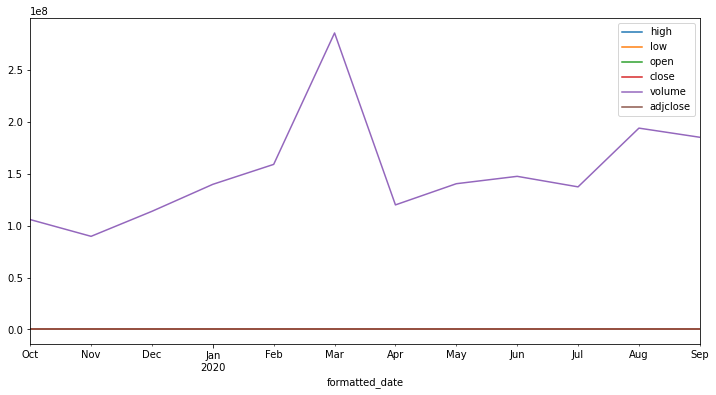

In [63]:
df_prices_m.plot(figsize=(12,6)) #volume is annoying

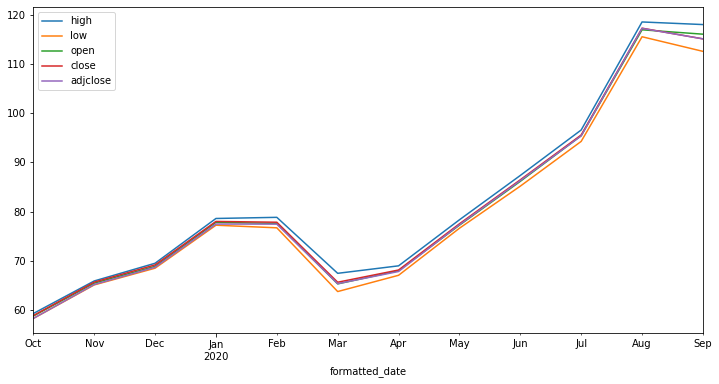

In [64]:
df_prices_m.drop(columns='volume').plot(figsize=(12,6))

### Rolling stats

In [65]:
df_prices['adjclose_ma30'] = df_prices['adjclose'].rolling(30).mean()

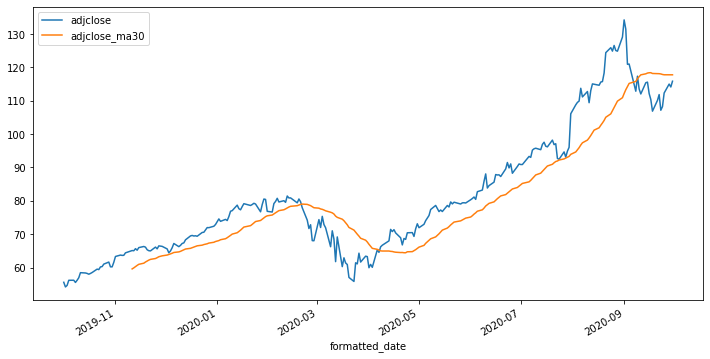

In [66]:
df_prices[['adjclose', 'adjclose_ma30']].plot(figsize=(12,6))

### Other methods

In [67]:
s = df_prices['adjclose'].head(10)

In [69]:
print(s.shift(1)) #1 day lag
print(s)

formatted_date
2019-10-01          NaN
2019-10-02    55.595886
2019-10-03    54.202213
2019-10-04    54.662643
2019-10-07    56.194942
2019-10-08    56.207317
2019-10-09    55.548851
2019-10-10    56.199894
2019-10-11    56.957375
2019-10-14    58.472343
Name: adjclose, dtype: float64
formatted_date
2019-10-01    55.595886
2019-10-02    54.202213
2019-10-03    54.662643
2019-10-04    56.194942
2019-10-07    56.207317
2019-10-08    55.548851
2019-10-09    56.199894
2019-10-10    56.957375
2019-10-11    58.472343
2019-10-14    58.388180
Name: adjclose, dtype: float64


In [70]:
s.pct_change() #nice inbuilt fct

formatted_date
2019-10-01         NaN
2019-10-02   -0.025068
2019-10-03    0.008495
2019-10-04    0.028032
2019-10-07    0.000220
2019-10-08   -0.011715
2019-10-09    0.011720
2019-10-10    0.013478
2019-10-11    0.026598
2019-10-14   -0.001439
Name: adjclose, dtype: float64

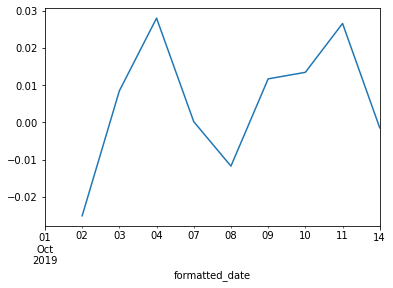

In [72]:
s.pct_change().plot()

In [73]:
s.diff(1) #absolute level of change between each period

formatted_date
2019-10-01         NaN
2019-10-02   -1.393673
2019-10-03    0.460430
2019-10-04    1.532299
2019-10-07    0.012375
2019-10-08   -0.658466
2019-10-09    0.651043
2019-10-10    0.757481
2019-10-11    1.514969
2019-10-14   -0.084164
Name: adjclose, dtype: float64

In [74]:
s.diff(2)

formatted_date
2019-10-01         NaN
2019-10-02         NaN
2019-10-03   -0.933243
2019-10-04    1.992729
2019-10-07    1.544674
2019-10-08   -0.646091
2019-10-09   -0.007423
2019-10-10    1.408524
2019-10-11    2.272449
2019-10-14    1.430805
Name: adjclose, dtype: float64